<a href="https://colab.research.google.com/github/DakshMalhotra15/vaccine_prediction_dataset/blob/main/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

##Vaccine Prediction Dataset

In [ ]:
url = ("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv")

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.head()

unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0          0         1.0             0.0                   0.0   
1          1         3.0             2.0                   0.0   
2          2         1.0             1.0                   0.0   
3          3         1.0             1.0                   0.0   
4          4         2.0             1.0                   0.0   

   contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                0.0               0.0                    0.0   
1                1.0               0.0                    1.0   
2                1.0               0.0                    0.0   
3                1.0               0.0                    1.0   
4                1.0               0.0                    1.0   

   avoid_large_gatherings  reduced_outside_home_cont  avoid_touch_face  ...  \
0                     0.0                        1.0               1.0  ...   
1                     0.0                        1.0               1.0  ...   
2                     0.0                        0.0               0.0  ...   
3                     1.0                        0.0               0.0  ...   
4                     1.0                        0.0               1.0  ...   

    race     sex               income_level  marital_status  housing_status  \
0  White  Female              Below Poverty     Not Married             Own   
1  White    Male              Below Poverty     Not Married            Rent   
2  White    Male  <= $75,000, Above Poverty     Not Married             Own   
3  White  Female              Below Poverty     Not Married            Rent   
4  White  Female  <= $75,000, Above Poverty         Married             Own   

           employment                census_msa  no_of_adults  no_of_children  \
0  Not in Labor Force                   Non-MSA           0.0             0.0   
1            Employed  MSA, Not Principle  City           0.0             0.0   
2            Employed  MSA, Not Principle  City           2.0             0.0   
3  Not in Labor Force       MSA, Principle City           0.0             0.0   
4            Employed  MSA, Not Principle  City           1.0             0.0   

   h1n1_vaccine  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 34 columns]

In [ ]:
df.info

<bound method DataFrame.info of        unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0              0         1.0             0.0                   0.0   
1              1         3.0             2.0                   0.0   
2              2         1.0             1.0                   0.0   
3              3         1.0             1.0                   0.0   
4              4         2.0             1.0                   0.0   
...          ...         ...             ...                   ...   
26702      26702         2.0             0.0                   0.0   
26703      26703         1.0             2.0                   0.0   
26704      26704         2.0             2.0                   0.0   
26705      26705         1.0             1.0                   0.0   
26706      26706         0.0             0.0                   0.0   

       contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                    0.0               0.0                

In [ ]:
df.describe()

unique_id    h1n1_worry  h1n1_awareness  antiviral_medication  \
count  26707.000000  26615.000000    26591.000000          26636.000000   
mean   13353.000000      1.618486        1.262532              0.048844   
std     7709.791156      0.910311        0.618149              0.215545   
min        0.000000      0.000000        0.000000              0.000000   
25%     6676.500000      1.000000        1.000000              0.000000   
50%    13353.000000      2.000000        1.000000              0.000000   
75%    20029.500000      2.000000        2.000000              0.000000   
max    26706.000000      3.000000        2.000000              1.000000   

       contact_avoidance  bought_face_mask  wash_hands_frequently  \
count       26499.000000      26688.000000           26665.000000   
mean            0.725612          0.068982               0.825614   
std             0.446214          0.253429               0.379448   
min             0.000000          0.000000               0.000000   
25%             0.000000          0.000000               1.000000   
50%             1.000000          0.000000               1.000000   
75%             1.000000          0.000000               1.000000   
max             1.000000          1.000000               1.000000   

       avoid_large_gatherings  reduced_outside_home_cont  avoid_touch_face  \
count             26620.00000               26625.000000      26579.000000   
mean                  0.35864                   0.337315          0.677264   
std                   0.47961                   0.472802          0.467531   
min                   0.00000                   0.000000          0.000000   
25%                   0.00000                   0.000000          0.000000   
50%                   0.00000                   0.000000          1.000000   
75%                   1.00000                   1.000000          1.000000   
max                   1.00000                   1.000000          1.000000   

       ...  has_health_insur  is_h1n1_vacc_effective  is_h1n1_risky  \
count  ...       14433.00000            26316.000000   26319.000000   
mean   ...           0.87972                3.850623       2.342566   
std    ...           0.32530                1.007436       1.285539   
min    ...           0.00000                1.000000       1.000000   
25%    ...           1.00000                3.000000       1.000000   
50%    ...           1.00000                4.000000       2.000000   
75%    ...           1.00000                5.000000       4.000000   
max    ...           1.00000                5.000000       5.000000   

       sick_from_h1n1_vacc  is_seas_vacc_effective  is_seas_risky  \
count         26312.000000            26245.000000   26193.000000   
mean              2.357670                4.025986       2.719162   
std               1.362766                1.086565       1.385055   
min               1.000000                1.000000       1.000000   
25%               1.000000                4.000000       2.000000   
50%               2.000000                4.000000       2.000000   
75%               4.000000                5.000000       4.000000   
max               5.000000                5.000000       5.000000   

       sick_from_seas_vacc  no_of_adults  no_of_children  h1n1_vaccine  
count         26170.000000  26458.000000    26458.000000  26707.000000  
mean              2.118112      0.886499        0.534583      0.212454  
std               1.332950      0.753422        0.928173      0.409052  
min               1.000000      0.000000        0.000000      0.000000  
25%               1.000000      0.000000        0.000000      0.000000  
50%               2.000000      1.000000        0.000000      0.000000  
75%               4.000000      1.000000        1.000000      0.000000  
max               5.000000      3.000000        3.000000      1.000000  

[8 rows x 25 columns]

In [ ]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [ ]:
!pip install autoviz
!pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

AV = AutoViz_Class()

Shape of your Data Set loaded: (26707, 34)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  10
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  6
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  3
    Number of Numeric-Boolean Columns =  14
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    34 Predictors classified...
        1 variables removed since they were ID or low-information variables
10 numeric variables in data exceeds limit, taking top 30 variables
Number of All Scatter Plots = 55


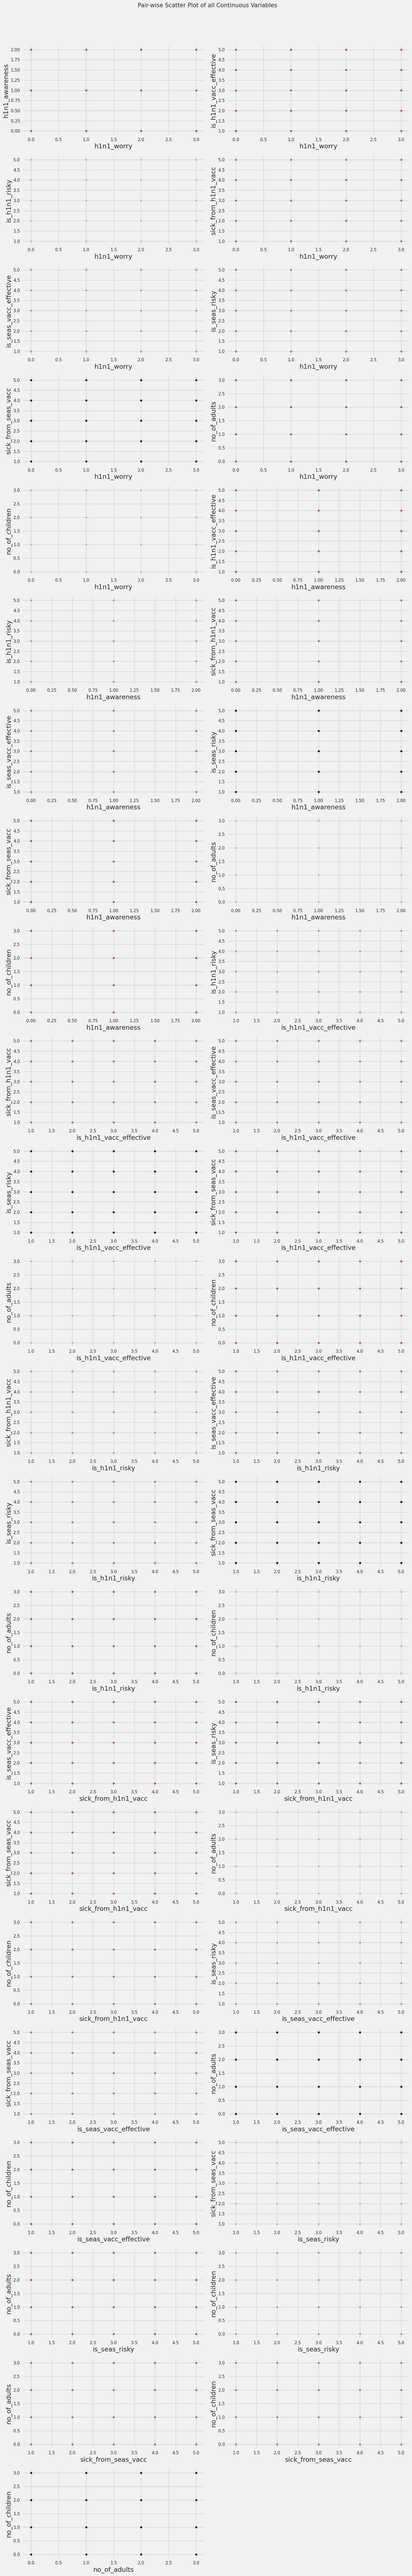

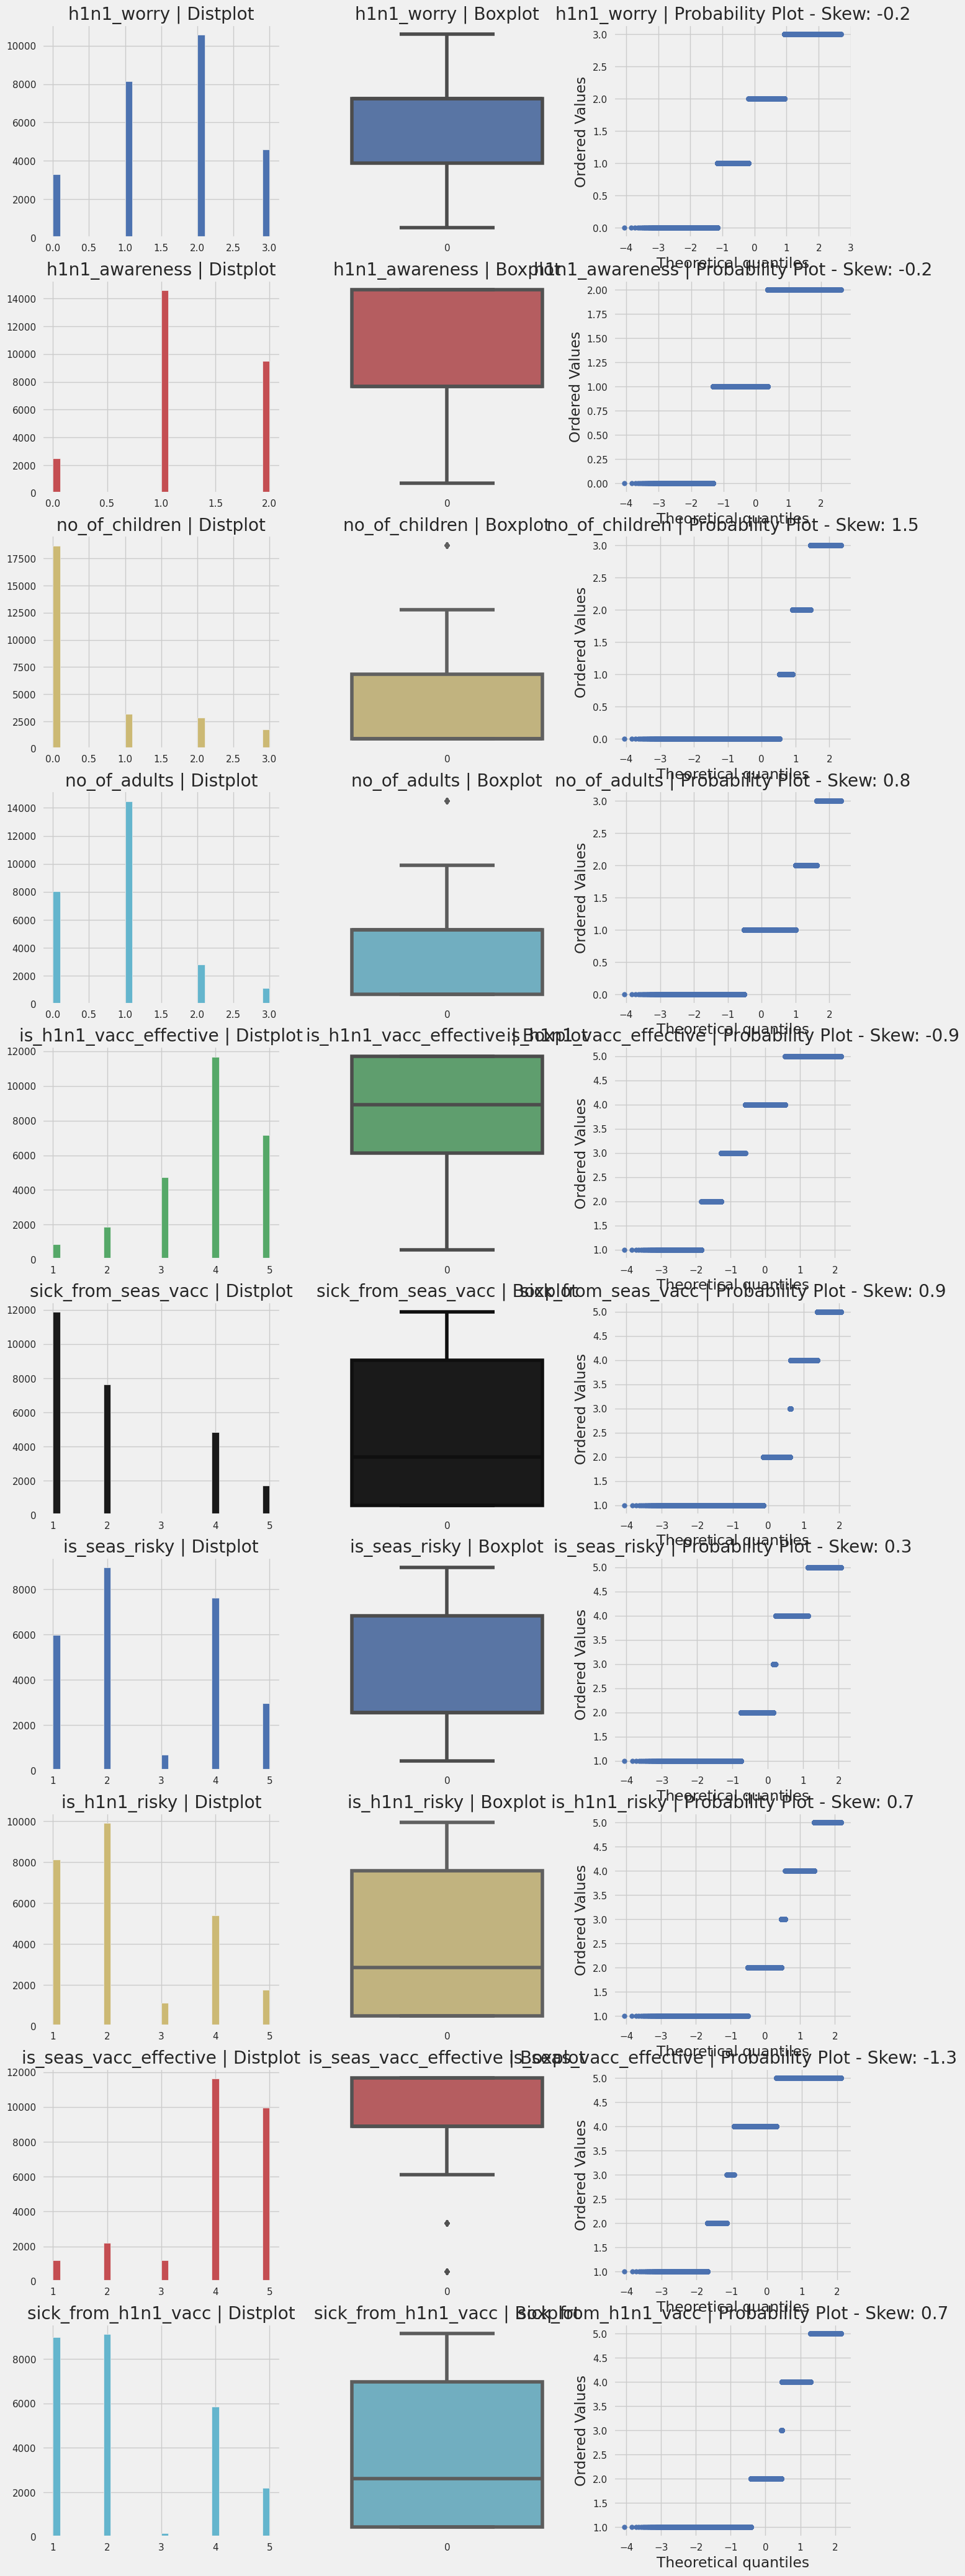

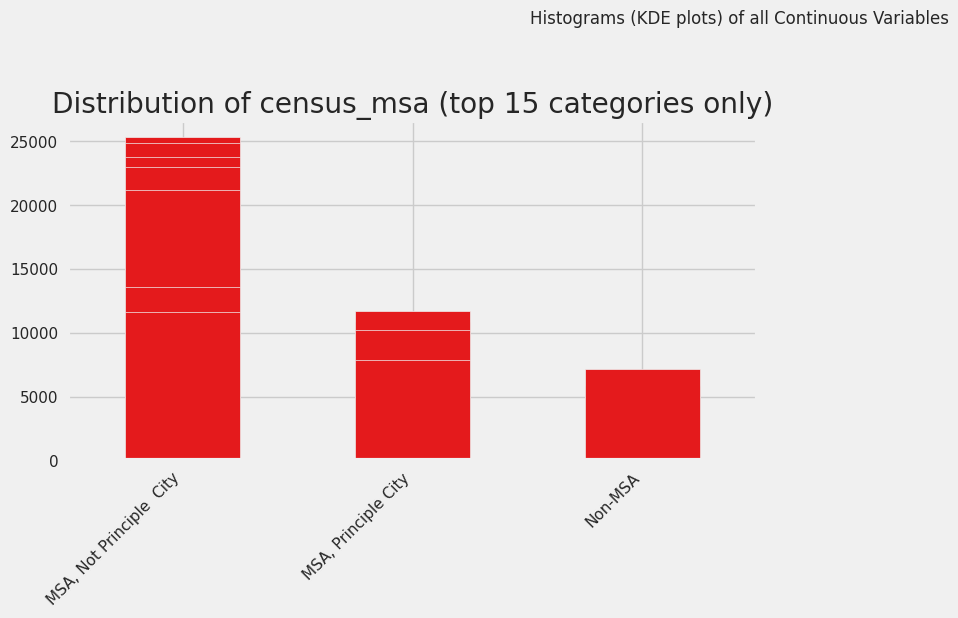

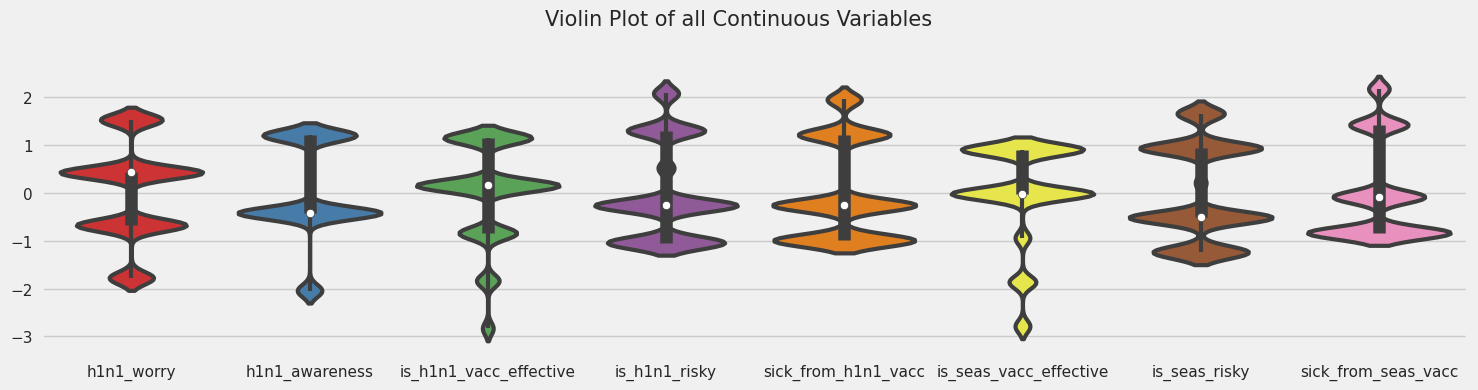

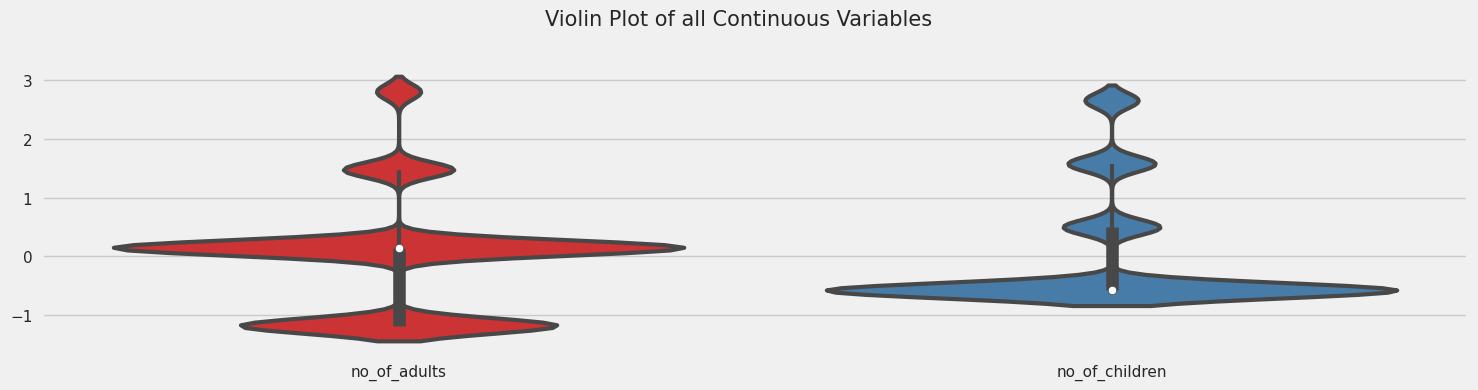

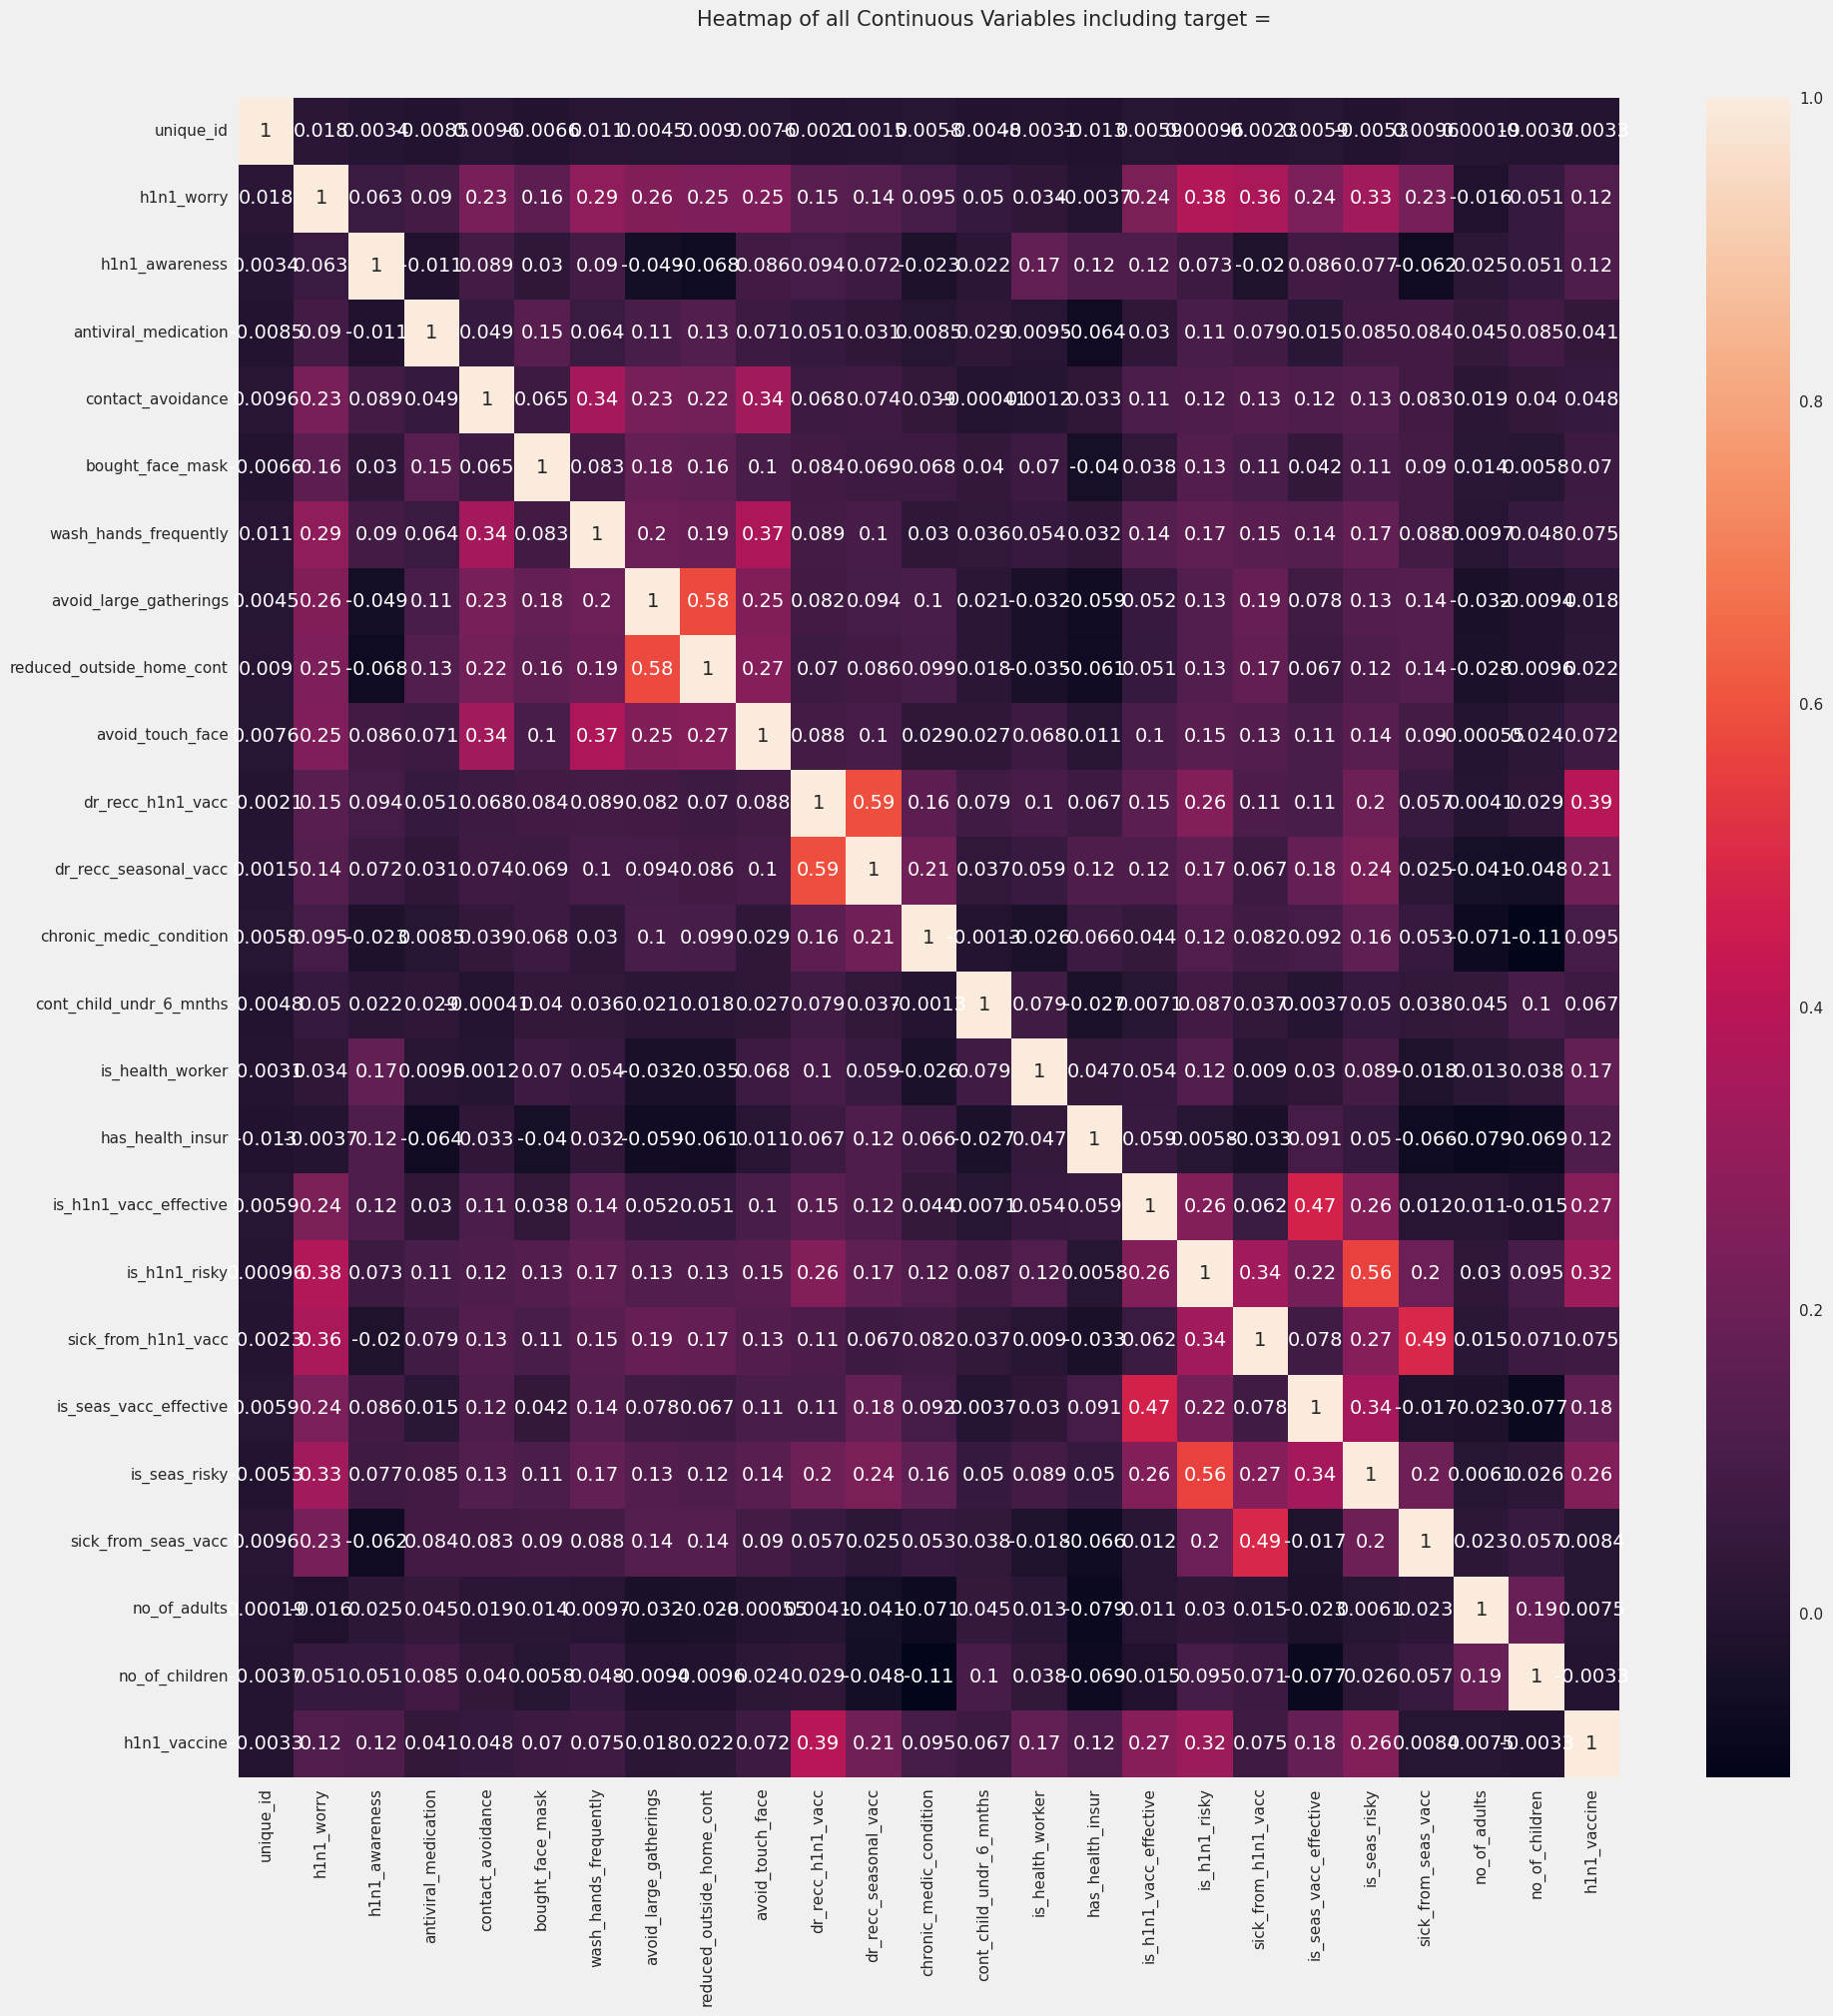

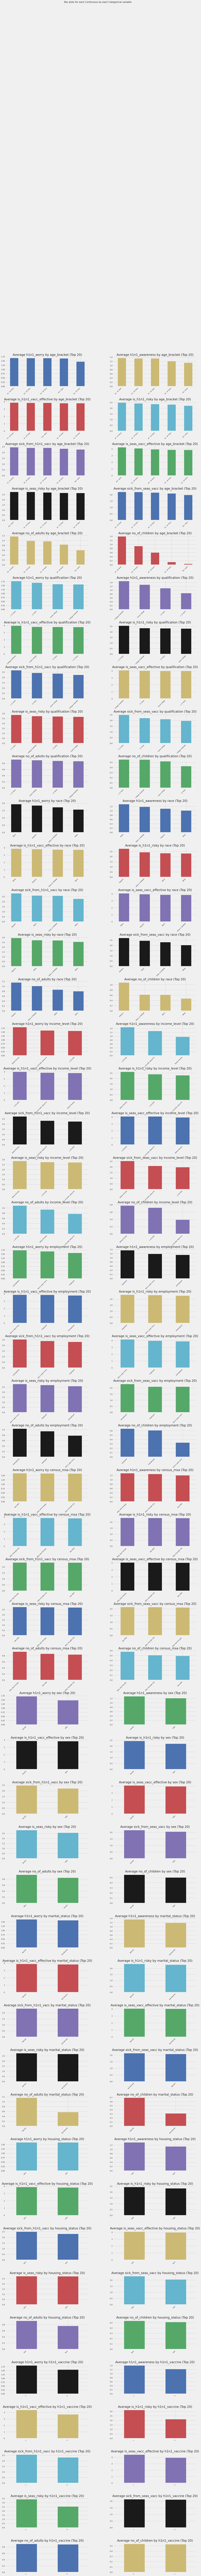

All Plots done
Time to run AutoViz = 70 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [ ]:
sep = ","
dft = AV.AutoViz(
    url,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg"
)